In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
class Model(nn.Module):
    """
    fully connected neural network
    in_features = number of physical characteristics
    h1 = number of neurons in hidden layer 1
    h2 = number of neurons in hidden layer 2
    out_features = species of plant  
    """
    def __init__(self, in_features=4,h1=8, h2=9, out_features=3):
        super().__init__() #instantiates the constructor method of the nn.Module class
        # nn.Linear creates a neural fully conected layer its own biases and weights randomly initializated with a linear transformation
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    
    def forward(self, x):
        # al the neurons have activations functions
        
        # the incoming data pass trought the first layer
        x = F.relu(self.fc1(x))
        
        # the output of the first layer pass trought the second layer
        x = F.relu(self.fc2(x))
        
        # the output of the second layer pass trought the output layer
        x = self.out(x)
        
        return x

In [19]:
torch.manual_seed(32)
model = Model()

In [20]:
df = pd.read_csv('data/iris.csv')

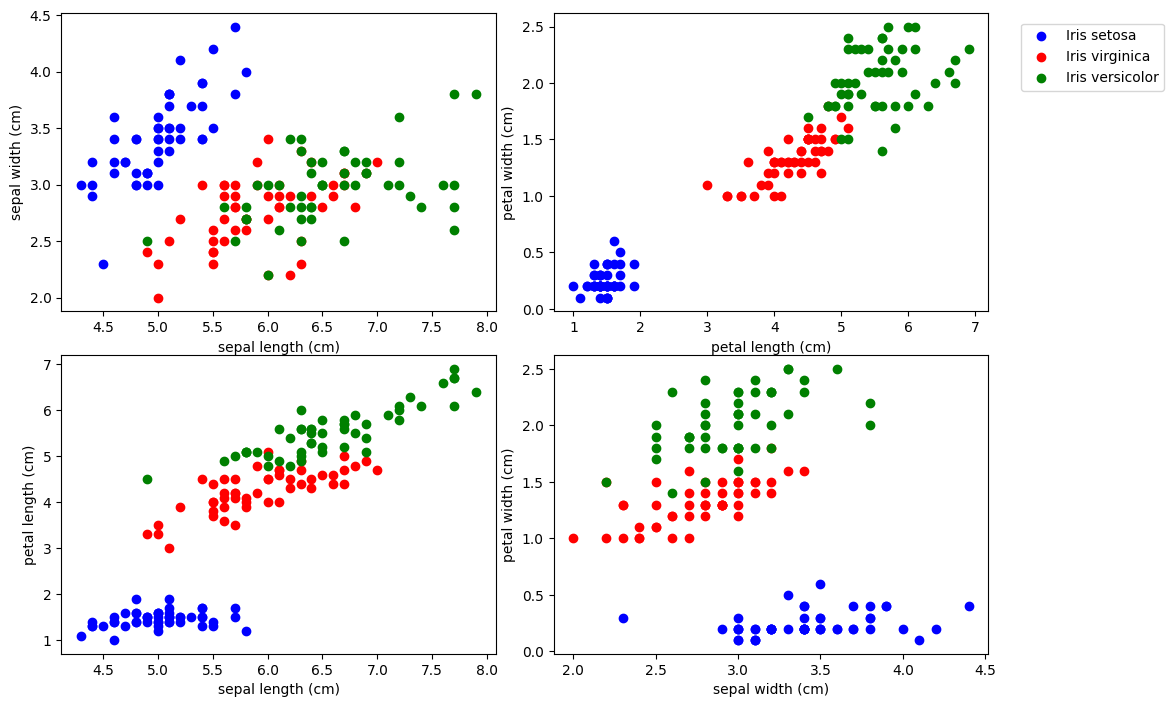

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

Data processsing

In [22]:
# X = set of inputs, y = expected result
# convert from pandas object to nparray object X and y with .values
X = df.drop('target', axis=1).values # all except 'target' is the inputs set
y = df['target'].values

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [25]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [26]:
# also can be used mean squared error and stochastic gradient descent
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [30]:
# train algorithm
# An epoch is 1 run through all the training data
epochs = 100
losses = []

for i in range(epochs):
    # Forward and get a prediction
    y_pred = model.forward(X_train)
    
    #calculate the loss
    loss = criterion(y_pred, y_train)
    
    #append losses
    losses.append(loss.item())
    
    if i % 10 == 0:
        print(f'Epoch {i}, The current loss: {loss}')
        
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    
    # update parameters
    optimizer.step()

Epoch 0, The current loss: 0.06713331490755081
Epoch 10, The current loss: 0.06355971843004227
Epoch 20, The current loss: 0.06085379421710968
Epoch 30, The current loss: 0.05870985612273216
Epoch 40, The current loss: 0.056958481669425964
Epoch 50, The current loss: 0.05549229681491852
Epoch 60, The current loss: 0.05423795059323311
Epoch 70, The current loss: 0.05314468964934349
Epoch 80, The current loss: 0.05217758193612099
Epoch 90, The current loss: 0.05131227895617485


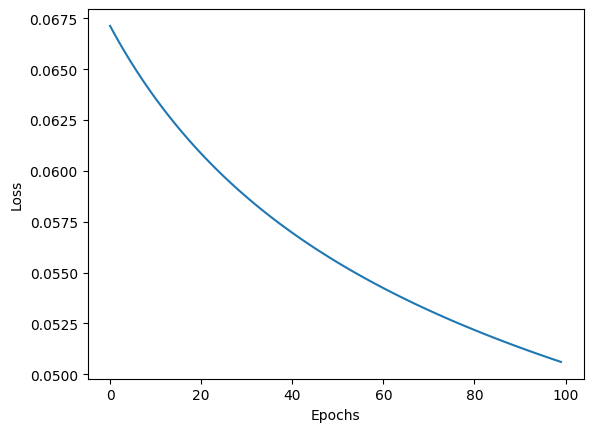

In [31]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()